# WaterNet Image basics

This notebook presents the basic functionalities of the following classes:
* WNBaseImage: The BaseImage represents a GeoTiff image stored in the disk (e.g., mask or tiff image)
* WNStacImage: a high level representation of a Sentinel-2 image originally stored in the PlanetaryComputer.
* WNImagePatcher: responsible for creating patches from a WNBaseImage or WNStacImage


In [20]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

from waternet.wnbaseimage import *
from waternet.wnstacimage import *
from waternet.wnimagepatcher import *

from tqdm.notebook import tqdm

import time 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## WNBaseImage

The BaseImage represents a GeoTiff image stored in the disk. 

In [19]:
img_path = Path(r'D:\Images\22KEV\images\S2A_MSIL2A_20220909T133201_N0400_R081_T22KEV_20220909T202800.SAFE\GRANULE\L2A_T22KEV_A037687_20220909T133157\IMG_DATA\R10m\T22KEV_20220909T133201_B02_10m.jp2')
img = WNBaseImage(img_path, transform=lambda arr: arr/10000, shape=None)
print(img)

WNBaseImage: array not loaded in memory



In [20]:
# To load the contents of the array in memory, we can call .array
img.array.shape

(1, 10980, 10980)

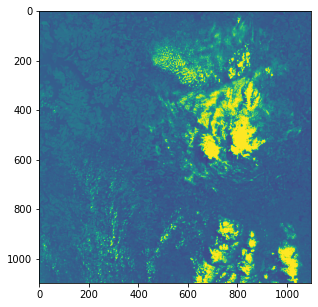

In [30]:
img.plot(figsize=(5, 5), cmap='viridis')

In [31]:
img.shape

(10980, 10980)

In [32]:
img.clear()
print(img)

WNBaseImage: array not loaded in memory



## Loading a Mask

In [13]:
mask = WNBaseImage('d:/temp/22KEV/S2A_MSIL2A_20180123T133221_R081_T22KEV_watermask.tif', shape=(5490, 5490))
print(mask)

WNBaseImage: array not loaded in memory



In [14]:
mask.shape

(5490, 5490)

In [15]:
mask.array.shape

(1, 5490, 5490)

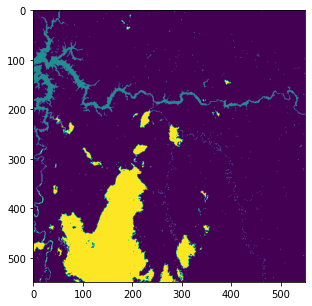

In [16]:
mask.plot(figsize=(5, 5))

## WNStacImage

The WNStacImage open a S2 tile from its tile and exact sensing date. If we don't know a specific date, we can use `WNStacImage.search_catalog` to find out images within a range

In [3]:
WNStacImage.search_tile(tile='22KEV', date_range='2022-08')

[<Item id=S2A_MSIL2A_20220830T133201_R081_T22KEV_20220901T031504>,
 <Item id=S2B_MSIL2A_20220825T133149_R081_T22KEV_20220826T055538>,
 <Item id=S2A_MSIL2A_20220820T133201_R081_T22KEV_20220821T064817>,
 <Item id=S2B_MSIL2A_20220815T133149_R081_T22KEV_20220816T000407>,
 <Item id=S2A_MSIL2A_20220810T133201_R081_T22KEV_20220811T182452>,
 <Item id=S2B_MSIL2A_20220805T133149_R081_T22KEV_20220806T052931>]

In [4]:
stacimg = WNStacImage.from_tile(tile='22KEV', str_date='2022-08-25', shape=(5490, 5490))
print(stacimg)

Img: S2B_MSIL2A_20220825T133149_R081_T22KEV_20220826T055538
Loaded bands: []


In [5]:
stacimg.shape

(5490, 5490)

In [6]:
stacimg.as_cube(bands=['B01', 'B09']).shape

(2, 5490, 5490)

In [7]:
stacimg.shape

(5490, 5490)

In [8]:
stacimg.as_cube(bands=["B04", "B03", "B02"]).shape

(3, 5490, 5490)

In [9]:
stacimg.array.shape

(5, 5490, 5490)

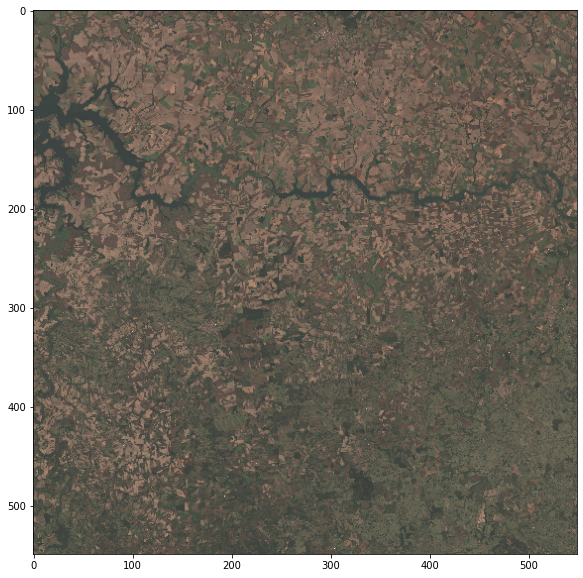

In [10]:
stacimg.plot()

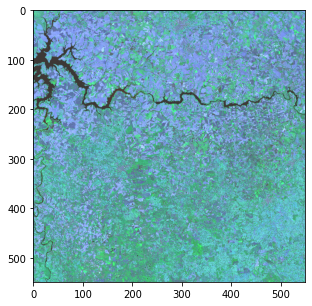

In [11]:
stacimg.plot(bands=['B04', 'B08', 'B11'], figsize=(5, 5))

In [20]:
stacimg.array

array([[[0.1256, 0.1256, 0.1256, ..., 0.1285, 0.1285, 0.1285],
        [0.1256, 0.1256, 0.1256, ..., 0.1285, 0.1285, 0.1285],
        [0.1256, 0.1256, 0.1256, ..., 0.1285, 0.1285, 0.1285],
        ...,
        [0.1207, 0.1207, 0.1207, ..., 0.1296, 0.1296, 0.1296],
        [0.1207, 0.1207, 0.1207, ..., 0.1296, 0.1296, 0.1296],
        [0.1207, 0.1207, 0.1207, ..., 0.1296, 0.1296, 0.1296]],

       [[0.2819, 0.2819, 0.2819, ..., 0.3553, 0.3553, 0.3553],
        [0.2819, 0.2819, 0.2819, ..., 0.3553, 0.3553, 0.3553],
        [0.2819, 0.2819, 0.2819, ..., 0.3553, 0.3553, 0.3553],
        ...,
        [0.3934, 0.3934, 0.3934, ..., 0.332 , 0.332 , 0.332 ],
        [0.3934, 0.3934, 0.3934, ..., 0.332 , 0.332 , 0.332 ],
        [0.3934, 0.3934, 0.3934, ..., 0.332 , 0.332 , 0.332 ]],

       [[0.1802, 0.1815, 0.1822, ..., 0.1883, 0.1881, 0.1869],
        [0.1784, 0.1801, 0.1818, ..., 0.193 , 0.1892, 0.1887],
        [0.1775, 0.1791, 0.1815, ..., 0.2032, 0.1948, 0.1942],
        ...,
        [0.1

## WNImagePatcher

In [43]:
from waternet.wnimagepatcher import WNImagePatcher

In [17]:
print(mask)
print(stacimg)

WNBaseImage: array loaded in memory

Img: S2B_MSIL2A_20220825T133149_R081_T22KEV_20220826T055538
Loaded bands: ['B01', 'B09', 'B04', 'B03', 'B02', 'B08', 'B11']


In [18]:
print(mask.loaded, stacimg.loaded)


True True


In [21]:
patcher = WNImagePatcher(mask, patch_size=(512, 512), step=262)
len(patcher)

400

In [22]:
patcher.patchify(bands=None)

In [23]:
patcher.unpatchify()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [24]:
patcher[0].shape

(1, 512, 512)

In [25]:
patcher = WNImagePatcher(img=stacimg, patch_size=(512, 512), step=262)
len(patcher)

400

In [26]:
stacimg.clear()
patcher.patchify(bands=['B11', 'B12'])
print(patcher)

Patcher with 400 patches created.


In [27]:
patcher[-1].shape

(2, 512, 512)

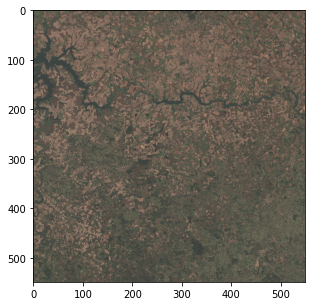

In [28]:
patcher.img.plot(figsize=(5, 5))

In [29]:
# get just one layer
arr = patcher.img.array[0]
arr.shape

(5490, 5490)

# Scratch Area

In [143]:
def burn_patch(arr, row, col, patch_size, line_width, value):
    # top line
    arr[row-line_width:row+line_width, col:col+patch_size[1]] = value
    # bottom line
    arr[row+patch_size[0]-line_width:row+patch_size[0]+line_width, col:col+patch_size[1]] = value
    #left line
    arr[row:row+patch_size[0], col-line_width:col+line_width] = value
    #right line
    arr[row:row+patch_size[0], col+patch_size[1]-line_width:col+patch_size[1]+line_width] = value

    # arr[row:row+patch_size[0], col:col+patch_size[1]] = value
    # print(row, row+patch_size[0], col, col+patch_size[1])


def hline(arr, row, line_width, value):
    arr[row-line_width:row+line_width, :] = value

def vline(arr, col, line_width, value):
    arr[:, col-line_width:col+line_width] = value

i = 0
for row in range(patcher._patchified_shape[1]):
    for col in range(patcher._patchified_shape[2]):
        i += 1
        burn_patch(arr, row * patcher._step, col * patcher._step, patcher._patch_size2d, 5, (i%10)/9)
        # hline(arr, (1+row) * patcher._step, 5, 1)
        # vline(arr, (1+col) * patcher._step, 5, 1)
i


400

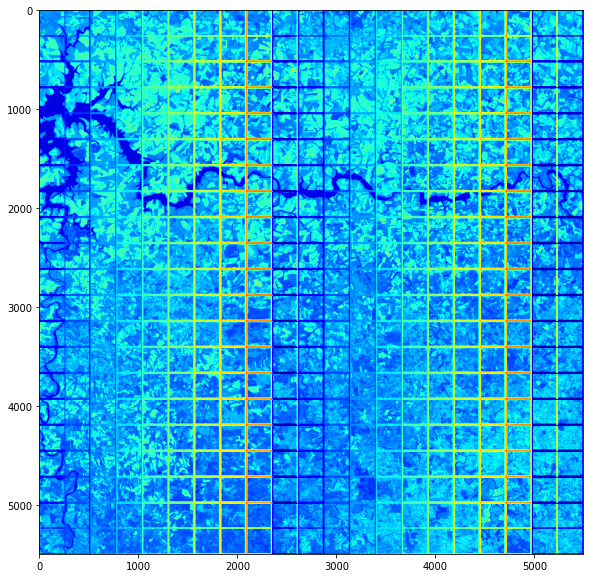

In [144]:
plt.figure(figsize=(10, 10))
plt.imshow(arr, cmap='jet')

In [57]:
patcher._patchified_shape

(1, 20, 20, 2, 512, 512)

In [60]:
patcher._patch_size2d

(512, 512)

In [146]:
stacimg.load_band('B8A')

In [148]:
stacimg.array.shape

(6, 5490, 5490)

In [154]:
patcher.patchify(bands=['B02', 'B03', 'B8A'])

In [155]:
patcher.patch_size

(3, 512, 512)

In [151]:
patcher.img

Img: S2B_MSIL2A_20220825T133149_R081_T22KEV_20220826T055538
Loaded bands: ['B11', 'B12', 'B04', 'B03', 'B02', 'B8A']

# WNDataset test

In [ ]:
# open one mask

import rasterio as rio
from pathlib import Path
import numpy as np

from waternet.wndataset import *

In [ ]:
mask = WNMask('tmp3/S2B_MSIL2A_20180915T133219_R081_T22KEV_watermask.tif')

In [ ]:
mask.mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 2, 0, 0],
       ...,
       [2, 2, 2, ..., 2, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0]], dtype=uint8)

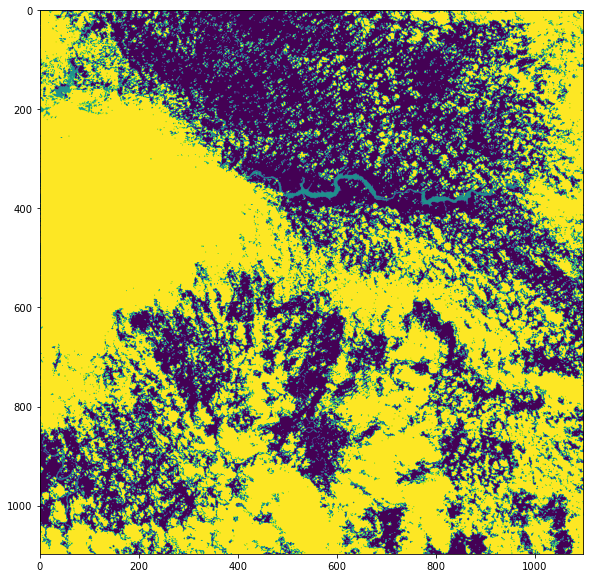

In [ ]:
mask.plot()

In [ ]:
item = WNSegmentationItem.from_mask('tmp3/S2B_MSIL2A_20180915T133219_R081_T22KEV_watermask.tif')

In [ ]:
item.shape

(10980, 10980)

In [ ]:
item.img.as_cube(['B04', 'B03', 'B02']).shape

(10980, 10980, 3)

In [ ]:
len(item)

1764

In [ ]:
item.patchify(['B04', 'B03', 'B02'])

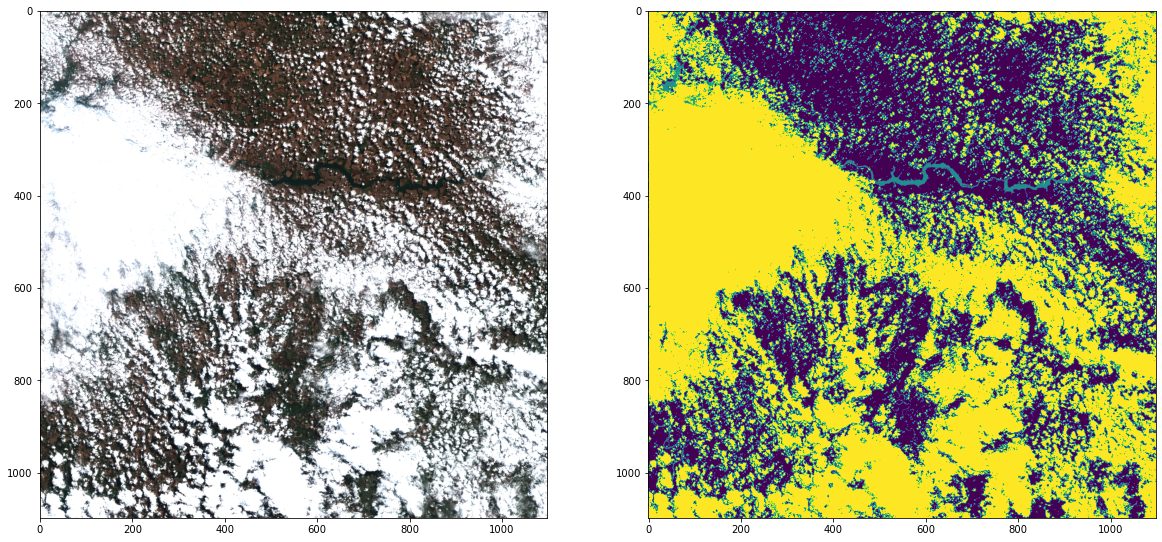

In [ ]:
item.plot()

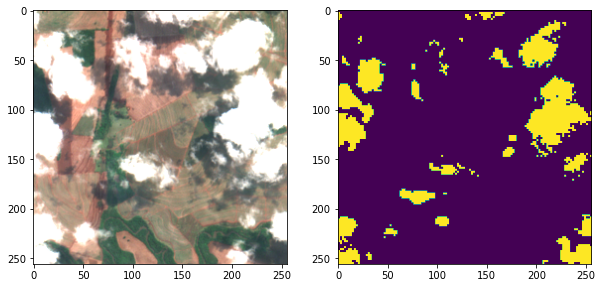

In [ ]:
item.plot_patch(10, bright=5.)

In [ ]:
from fastai.vision.all import *

In [ ]:
# del dl
device = 'cuda:0'
device = 'cpu'
dl = DataLoader(dataset=item, bs=4, device=device)

In [ ]:
dl.do_item(0)[1].shape

(256, 256)

In [ ]:
item[0][0].dtype

dtype('float32')

In [ ]:
b = dl.create_batch([item[0], item[1], item[2]])
b[0].dtype

torch.float32

In [ ]:
t = dl.one_batch()[0]
t

tensor([[[[0.3566, 0.3542, 0.3618,  ..., 0.2354, 0.2268, 0.2114],
          [0.3462, 0.3470, 0.3552,  ..., 0.2192, 0.2170, 0.2018],
          [0.3482, 0.3398, 0.3254,  ..., 0.2202, 0.2054, 0.1974],
          ...,
          [0.5692, 0.5716, 0.6040,  ..., 0.4340, 0.4400, 0.4296],
          [0.5944, 0.5888, 0.6112,  ..., 0.4156, 0.4296, 0.4276],
          [0.6016, 0.5908, 0.6172,  ..., 0.4084, 0.4096, 0.4132]],

         [[0.3646, 0.3550, 0.3654,  ..., 0.2604, 0.2532, 0.2310],
          [0.3548, 0.3538, 0.3666,  ..., 0.2468, 0.2442, 0.2264],
          [0.3528, 0.3426, 0.3338,  ..., 0.2430, 0.2388, 0.2236],
          ...,
          [0.5512, 0.5648, 0.5980,  ..., 0.4400, 0.4464, 0.4352],
          [0.5888, 0.5856, 0.6112,  ..., 0.4196, 0.4320, 0.4320],
          [0.6000, 0.5960, 0.6212,  ..., 0.4090, 0.4232, 0.4208]],

         [[0.3784, 0.3696, 0.3770,  ..., 0.2632, 0.2554, 0.2352],
          [0.3692, 0.3692, 0.3830,  ..., 0.2482, 0.2476, 0.2256],
          [0.3686, 0.3652, 0.3526,  ..., 0

In [ ]:
# for b in dl:
#     print(b[0].shape)

In [ ]:
def loss_fn(pred, targ):
#     pdb.set_trace()
    
    return torch.nn.functional.cross_entropy(pred, targ.squeeze(1).type(torch.long))

In [ ]:
dls = DataLoaders(dl, dl)

In [ ]:
learner = unet_learner(dls, resnet18, normalize=False, n_out=5, pretrained=True, loss_func=loss_fn)

/srv/conda/envs/notebook/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learner.summary()

DynamicUnet (Input shape: 4 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     4 x 64 x 128 x 128  
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     4 x 64 x 64 x 64    
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [ ]:
pred = learner.forward(b[0])

pred.shape

torch.Size([3, 5, 256, 256])

In [ ]:
pred = learner.predict(b[0])

torch.Size([1, 3, 3, 256, 256])
torch.Size([1, 5, 256, 256])
2


In [ ]:
pred[0].shape

torch.Size([1, 3, 3, 256, 256])

In [ ]:
learner.cuda()

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

SuggestedLRs(valley=0.0002754228771664202)

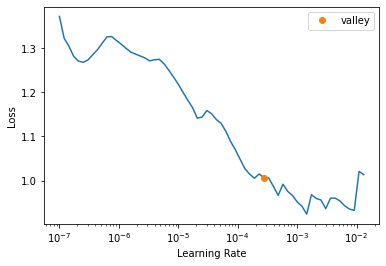

In [ ]:
learner.cuda()
learner.lr_find()

In [ ]:
learner.fit_one_cycle(10, lr_max=slice(1e-5, 1e-3))

In [ ]:
learner.fit_one_cycle(10, lr_max=slice(1e-5, 1e-3))

In [ ]:
pred = learner.predict(b[0])

In [ ]:
pred[0].shape, pred[1].shape

(torch.Size([1, 3, 3, 256, 256]), torch.Size([5, 256, 256]))

In [ ]:
b[0].shape

torch.Size([4, 3, 256, 256])

In [ ]:
len(pred)

3

In [ ]:
b[0][None, ...].shape

(1, 3, 256, 256)

In [ ]:
pred = learner.model.forward(b[0].cuda())

In [ ]:
pred.shape

torch.Size([4, 5, 256, 256])

In [ ]:
pred = learner.model.forward(Tensor(b[0][None, ...]).cuda())

In [ ]:
pred.shape

torch.Size([1, 5, 256, 256])

In [ ]:
b[0].shape

(3, 256, 256)

In [ ]:
idx = slice(100, 110)

In [ ]:
for i in range(idx.start, idx.stop):
    pass

In [ ]:
i = range(1, 10)

In [ ]:
idxs = range(1, 10)

fig, ax = plt.subplots(len(idxs), 3, figsize=(15, len(idxs) * 5))

for i, idx in enumerate(idxs):
    inpt, targ = dls.create_item(idx)
    pred = learner.model.forward(Tensor(inpt[None, ...]).cuda()).squeeze()

    rgb = inpt.transpose((1, 2, 0))*2.
    rgb[rgb > 1] = 1
    ax[i][0].imshow(rgb)
    ax[i][1].imshow(targ)
    ax[i][2].imshow(pred.argmax(dim=0).cpu())

In [ ]:
t = pred[idx]

IndexError: index 31 is out of bounds for dimension 0 with size 5

In [ ]:
t.argmax(dim=0)

TensorBase([[0, 2, 2,  ..., 2, 2, 2],
        [0, 2, 2,  ..., 2, 2, 2],
        [0, 0, 0,  ..., 2, 2, 2],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [2, 2, 0,  ..., 0, 2, 2],
        [2, 2, 0,  ..., 0, 2, 2]], device='cuda:0')

In [ ]:
dls.loaders

In [ ]:
dls.valid_ds

In [ ]:
b[0].shape

In [ ]:
b[1].shape

In [ ]:
b = dl.do_batch([item[0], item[1], item[2]])

In [ ]:
b[0].shape